In [29]:
## Run some preliminary models on cleaned visa perm data

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [31]:
# # Unpickle
perm_df = pd.read_pickle("./perm_clean_df.pkl")

In [32]:
perm_df.head()

,case_outcome,fiscal_year_of_application,processing_center,class_of_admission,country_of_citizenship,citizenship_same_as_birth,wage_for_job,job_soc_code,job_economic_sector,employer_completed_application,decision_month_year,applicant_highest_education,training_required,layoff_in_past_six_months,ownership_interest,employer_num_employees,worker_state_abv,job_same_state,has_required_experience
0,1,2008,A,a1/a2,mauritania,1,53039.0,35,unclassified,0,200809,unknown,0,0,0,28602.038217,unknown,1,n
1,1,2008,C,a1/a2,pakistan,1,53039.0,19,unclassified,0,200711,unknown,0,0,0,28602.038217,unknown,1,n
2,0,2008,A,a3,philippines,1,53039.0,35,unclassified,0,200807,unknown,0,0,0,28602.038217,unknown,1,n
3,1,2008,A,a3,portugal,1,53039.0,47,unclassified,0,200710,unknown,0,0,0,28602.038217,unknown,1,n
4,1,2008,A,b1,sierra leone,1,53039.0,99,unclassified,0,200809,unknown,0,0,0,28602.038217,unknown,1,n


In [33]:
print(f" Certified: {((perm_df.case_outcome.value_counts()[0]/perm_df.case_outcome.count())*100).round(2)}%")
print(f" Denied: {((perm_df.case_outcome.value_counts()[1]/perm_df.case_outcome.count())*100).round(2)}%")

 Certified: 90.66%
 Denied: 9.34%


In [35]:
perm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848252 entries, 0 to 848251
Data columns (total 19 columns):
case_outcome                      848252 non-null category
fiscal_year_of_application        848252 non-null category
processing_center                 848252 non-null category
class_of_admission                848252 non-null category
country_of_citizenship            848252 non-null object
citizenship_same_as_birth         848252 non-null category
wage_for_job                      848252 non-null float64
job_soc_code                      848252 non-null category
job_economic_sector               848252 non-null object
employer_completed_application    848252 non-null category
decision_month_year               848252 non-null category
applicant_highest_education       848252 non-null category
training_required                 848252 non-null category
layoff_in_past_six_months         848252 non-null category
ownership_interest                848252 non-null category
employer_

In [37]:
perm_df.head()

,case_outcome,fiscal_year_of_application,processing_center,class_of_admission,country_of_citizenship,citizenship_same_as_birth,wage_for_job,job_soc_code,job_economic_sector,employer_completed_application,decision_month_year,applicant_highest_education,training_required,layoff_in_past_six_months,ownership_interest,employer_num_employees,worker_state_abv,job_same_state,has_required_experience
0,1,2008,A,a1/a2,mauritania,1,53039.0,35,unclassified,0,200809,unknown,0,0,0,28602.038217,unknown,1,n
1,1,2008,C,a1/a2,pakistan,1,53039.0,19,unclassified,0,200711,unknown,0,0,0,28602.038217,unknown,1,n
2,0,2008,A,a3,philippines,1,53039.0,35,unclassified,0,200807,unknown,0,0,0,28602.038217,unknown,1,n
3,1,2008,A,a3,portugal,1,53039.0,47,unclassified,0,200710,unknown,0,0,0,28602.038217,unknown,1,n
4,1,2008,A,b1,sierra leone,1,53039.0,99,unclassified,0,200809,unknown,0,0,0,28602.038217,unknown,1,n


### Get dummies

In [39]:
perm_dummied = perm_df.join(pd.get_dummies(perm_df[['fiscal_year_of_application', 'processing_center', 'class_of_admission', 'country_of_citizenship', 'job_soc_code', 'job_economic_sector', 'decision_month_year', 'applicant_highest_education', 'worker_state_abv', 'has_required_experience']], drop_first=True))



In [43]:
perm_dummied.drop(['fiscal_year_of_application', 'processing_center', 'class_of_admission', 'country_of_citizenship', 'job_soc_code', 'job_economic_sector', 'decision_month_year', 'applicant_highest_education', 'worker_state_abv', 'has_required_experience'], axis=1, inplace=True)


In [44]:
perm_dummied.head()

,case_outcome,citizenship_same_as_birth,wage_for_job,employer_completed_application,training_required,layoff_in_past_six_months,ownership_interest,employer_num_employees,job_same_state,fiscal_year_of_application_2009,...,worker_state_abv_VA,worker_state_abv_VI,worker_state_abv_VT,worker_state_abv_WA,worker_state_abv_WI,worker_state_abv_WV,worker_state_abv_WY,worker_state_abv_unknown,has_required_experience_n,has_required_experience_y
0,1,1,53039.0,0,0,0,0,28602.038217,1,0,...,0,0,0,0,0,0,0,1,1,0
1,1,1,53039.0,0,0,0,0,28602.038217,1,0,...,0,0,0,0,0,0,0,1,1,0
2,0,1,53039.0,0,0,0,0,28602.038217,1,0,...,0,0,0,0,0,0,0,1,1,0
3,1,1,53039.0,0,0,0,0,28602.038217,1,0,...,0,0,0,0,0,0,0,1,1,0
4,1,1,53039.0,0,0,0,0,28602.038217,1,0,...,0,0,0,0,0,0,0,1,1,0


### Run logistic regression (no oversample)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = perm_dummied.drop('case_outcome', axis=1)
y = perm_dummied['case_outcome']

X_train, X_hold_out, y_train, y_hold_out = train_test_split(X, y, test_size=.20, random_state=14)

In [47]:
from collections import Counter
Counter(y_hold_out)

Counter({0: 153634, 1: 16017})

In [49]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [64]:
# Log Reg with Cross Validation
lr_cv = LogisticRegressionCV(random_state=14).fit(X_train, y_train)
lr_cv_predprob = lr_cv.predict_proba(X_hold_out)
lr_cv_pred= lr_cv.predict(X_hold_out)

In [55]:
# Log Reg on train and validation data
lr = LogisticRegression(random_state=28).fit(X_train, y_train)
lr_predprob = lr.predict_proba(X_hold_out)
lr_pred = lr.predict(X_hold_out)

<Figure size 720x504 with 0 Axes>

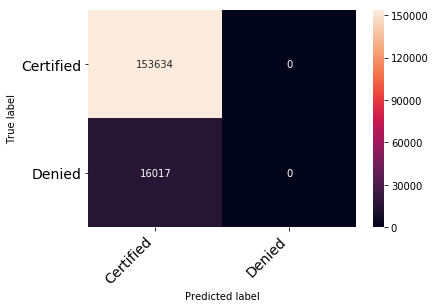

<Figure size 720x504 with 0 Axes>

In [56]:
# Print confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix

cm = confusion_matrix(y_hold_out, lr_pred)
print_confusion_matrix(cm, ["Certified", "Denied"])

In [67]:
log_reg_errors(y_hold_out, lr_cv_pred, X_train, y_train)

'Accuracy: 0.906 \n    Precision: 0.0 \n    Recall: 0.0 \n    F1: 0.0'

### Address class imbalance - Oversampling

In [57]:
from imblearn.over_sampling import RandomOverSampler

In [58]:
ros = RandomOverSampler(random_state=27)
X_resampled, y_resampled = ros.fit_sample(X, y)

In [59]:
values, counts = np.unique(y_resampled, return_counts=True)
dict(zip(values, counts))

{0: 769009, 1: 769009}

In [60]:
from collections import Counter
Counter(y_resampled)

Counter({1: 769009, 0: 769009})

In [61]:
X_res_train, X_res_hold_out, y_res_train, y_res_hold_out = train_test_split(X_resampled, y_resampled, test_size=.20, random_state=14)

In [62]:
# Log Reg on train and validation data
lr = LogisticRegression(random_state=28).fit(X_res_train, y_res_train)
lr_predprob = lr.predict_proba(X_res_hold_out)
lr_pred = lr.predict(X_res_hold_out)

<Figure size 720x504 with 0 Axes>

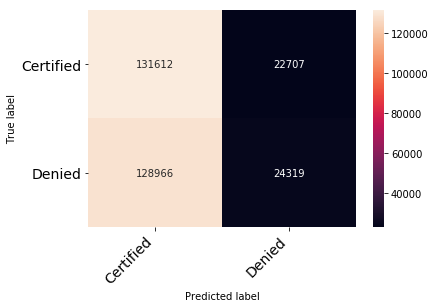

<Figure size 720x504 with 0 Axes>

In [63]:
cm = confusion_matrix(y_res_hold_out, lr_pred)
print_confusion_matrix(cm, ["Certified", "Denied"])

In [68]:
# Log Reg with Cross Validation
lr_cv = LogisticRegressionCV(random_state=14).fit(X_res_train, y_res_train)
lr_cv_predprob = lr_cv.predict_proba(X_res_hold_out)
lr_cv_pred= lr_cv.predict(X_res_hold_out)

In [70]:
log_reg_errors(y_res_hold_out, lr_cv_pred, X_res_train, y_res_train)

'Accuracy: 0.507 \n    Precision: 0.517 \n    Recall: 0.159 \n    F1: 0.243'

### Functions

In [53]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names) 
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label');
    return plt.figure(figsize=figsize);

In [66]:
def log_reg_errors(y_val, prediction, x_train, y_train):

    '''Returns Accuracy, Precision, Recall and F1 Scores for Logistic 
    Regression and Cross Validation models. 
    
    Inputs: Y validation data
            Logistic Regression Predictions
            X training data
            Y training data'''
    
    cross_val_model = LogisticRegressionCV(random_state=14).fit(x_train, y_train)
    
    accuracy = (accuracy_score(y_val, prediction)).round(3)
    #cross_val_acc = (cross_val_score(cross_val_model, x_train, y_train)).mean().round(3)
    precision = (precision_score(y_val, prediction)).round(3)
    #cross_val_prec = (cross_val_score(cross_val_model, x_train, y_train, scoring='precision')).mean().round(3)
    recall = (recall_score(y_val, prediction)).round(3)
    #cross_val_recall = (cross_val_score(cross_val_model, x_train, y_train, scoring='recall')).mean().round(3)
    f1 = (f1_score(y_val, prediction)).round(3)
    #cross_val_f1 = (cross_val_score(cross_val_model, x_train, y_train, scoring='f1')).mean().round(3)
    
    return(f'''Accuracy: {accuracy} 
    Precision: {precision} 
    Recall: {recall} 
    F1: {f1}''')